In [75]:
import numpy as np
np.random.seed(42)
X = np.linspace(-np.pi,np.pi, 100)
y = np.sin(X) #+ np.random.randn(100)  #  노이즈 추가

In [76]:
# #균등하게 나누는거 linspace
# X[1] =-X[0], X[2] -X[1] 

In [77]:
# 가중치 초기값
a,b,c,d = 0. , 0. , 0. , 0.
eta  = 1e-3  #learning rate  0.001
epochs = 1000


In [78]:
# 학습과정 기록  손실값, 파라메터의 값
mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) ) #튜플로

모델의 출력(예측) y= ax**3 +b*x**2 +c*x +d
오차 e = y- y_hagt
손실함수 mse
np.mean(e^2) 

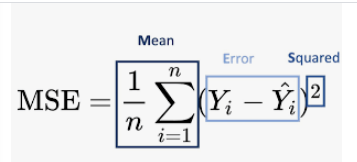

- 기울기 DL / Ddeta(seta - a,b,c,d 중에 하나) 손실 L이 y_hat을 통해 seta에 의존 연쇄법칙이 가능

- 편미분 a로 편미분 X**3
- 편미분 b로 편미분 X**2
- 편미분 c로 편미분 X
- 편미분 d로 편미분 1 

- 기울기 a 2(y-y_hat)X**3 
- 기울기 b 2(y-y_hat)X**2 
- 기울기 c 2(y-y_hat)X 
- 기울기 d 2(y-y_hat)*1 

In [79]:
for epoch in range(epochs):
    y_hat = a*X**3+b*X**2 +c*X+d
    e  =y - y_hat
    #mse
    mse = np.mean(e**2)
    mse_history[epoch]=mse

    #gradients
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e)

    #update: 0 += eta*2 *d0(부호/스케일 적용)
    a -= eta*da
    b -= eta*db
    c -= eta*dc
    d -= eta*dd

    parameter_history[epoch] = [a,b,c,d]

    #최종결과
    print(a,b,c,d,mse)



0.003827628771192398 -7.897235004608106e-21 0.0009896676677762994 -1.0016361325182357e-20 0.495
0.007077216455429219 -1.233604295656244e-19 0.0018984115366768996 -1.9730812790652478e-20 0.4660322461572603
0.009834668228037302 -2.8323254511164694e-19 0.002738222539763799 -3.3886156354623225e-20 0.4449228562002174
0.012173123246037221 -4.564273369531714e-19 0.003519309705050178 -4.3323052063937056e-20 0.42950989087072655
0.014154851753762701 -6.695901576812014e-19 0.004250364957091207 -7.27439622165037e-20 0.4182262209920538
0.015832870267395282 -9.00516546803234e-19 0.0049387885674965866 -9.550353422131941e-20 0.40993587851121255
0.017252316733550307 -1.2113789936982779e-18 0.0055908811021671565 -1.2770000193544895e-19 0.4038154319654004
0.01845162133118594 -1.5311232247903228e-18 0.006212006844039987 -1.6544758477270428e-19 0.3992679988890229
0.01946350328544276 -1.8686310242763705e-18 0.0068067329302496414 -2.0208494458533444e-19 0.3958609158223832
0.020315819549067287 -2.259429528944

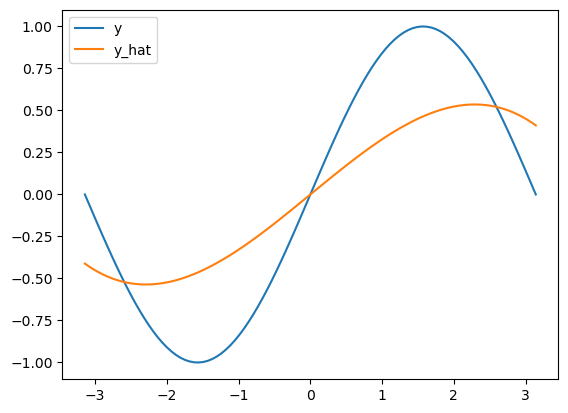

In [80]:
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat, label='y_hat')
plt.legend()
plt.show()

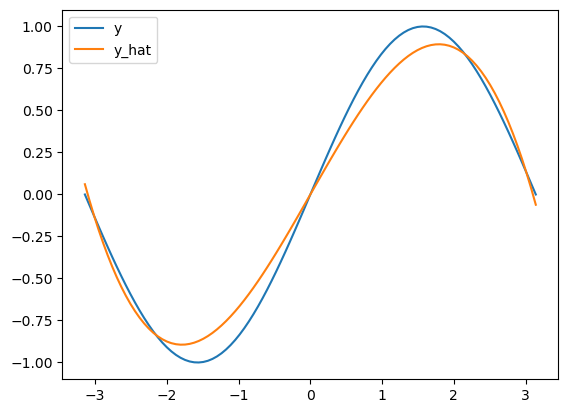

In [81]:
# 텐서로 변경-텐서는 자동미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0., requires_grad=True) 
b = torch.tensor(0., requires_grad=True) 
c = torch.tensor(0., requires_grad=True) 
d = torch.tensor(0., requires_grad=True) 

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros((epochs, 4))
for epoch in range(epochs):
    y_hat = a*X**3+ b*X**2+c*X+d
    e = y - y_hat #forward 모델
    #오차
    mse = torch.mean((y-y_hat)**2)

    mse.backward()
    mse_history[epoch]= mse.item()
    #역전 파 - 수동
    with torch.no_grad(): #메모리측면에서 기록을 안한다
        a -=eta*2*a.grad
        b -=eta*2*b.grad
        c -=eta*2*c.grad
        d -=eta*2*d.grad
        # 그레이던트 초기화
        a.grad.zero_() ; a.grad.zero_() ; c.grad.zero_();  d.grad.zero_()
    parameter_history[epoch] = [a.item(), b.item(),c.item(), d.item()] 

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

In [82]:
# X.size()
#이걸 토치의 stack으로 쌓을거임..?
torch.stack([X**3, X**2, X,torch.ones_like(X)],dim=1)

tensor([[-3.1006e+01,  9.8696e+00, -3.1416e+00,  1.0000e+00],
        [-2.9165e+01,  9.4749e+00, -3.0781e+00,  1.0000e+00],
        [-2.7398e+01,  9.0882e+00, -3.0147e+00,  1.0000e+00],
        [-2.5704e+01,  8.7095e+00, -2.9512e+00,  1.0000e+00],
        [-2.4081e+01,  8.3390e+00, -2.8877e+00,  1.0000e+00],
        [-2.2528e+01,  7.9764e+00, -2.8243e+00,  1.0000e+00],
        [-2.1043e+01,  7.6220e+00, -2.7608e+00,  1.0000e+00],
        [-1.9625e+01,  7.2756e+00, -2.6973e+00,  1.0000e+00],
        [-1.8272e+01,  6.9372e+00, -2.6339e+00,  1.0000e+00],
        [-1.6982e+01,  6.6069e+00, -2.5704e+00,  1.0000e+00],
        [-1.5755e+01,  6.2847e+00, -2.5069e+00,  1.0000e+00],
        [-1.4589e+01,  5.9705e+00, -2.4435e+00,  1.0000e+00],
        [-1.3481e+01,  5.6644e+00, -2.3800e+00,  1.0000e+00],
        [-1.2431e+01,  5.3663e+00, -2.3165e+00,  1.0000e+00],
        [-1.1437e+01,  5.0763e+00, -2.2531e+00,  1.0000e+00],
        [-1.0498e+01,  4.7943e+00, -2.1896e+00,  1.0000e+00],
        

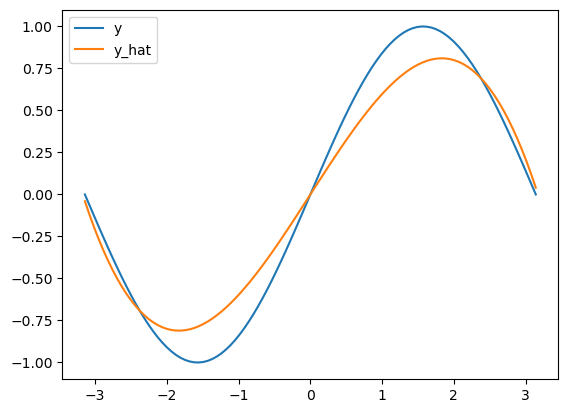

In [83]:
from torch.optim import Adam

import torch
import numpy as np
import torch.nn as nn
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0., requires_grad=True) 
b = torch.tensor(0., requires_grad=True) 
c = torch.tensor(0., requires_grad=True) 
d = torch.tensor(0., requires_grad=True) 
# 하이퍼파라메터
eta = 1e-3
epochs = 1000

optim = Adam([a,b,c,d],lr =eta)
#기저함수 행렬(100,4)
X_theta = torch.stack([X**3,X**2, X, torch.ones_like(X)],dim=1)
#가중치 벡터 초기화
w = torch.zeros(4, requires_grad=True)
# w = torch.tensor([0.,0.,0.,0.], requires_grad=True) # 왜 이럴필요가 없음/
# 가중치 적용
optim = Adam([w], lr=eta)
#손실함수
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    optim.zero_grad()
    y_hat = X_theta@w #(100,4) $(4,) =  (100,)
    loss = criterion(y_hat, y) 
    loss.backward()
    optim.step()

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()    

In [84]:
# Xsetha = [X^3, X^2,X,1]
# w = [a,b,c,d]
# y_hat = Xsetha dot w


In [85]:
X.size()

torch.Size([100])

In [86]:
# X 텐서이고 100,4 형태로 제공
# 각 차수에 대응하는 가중치를 정해서 --- 토치의 모델을 사용하면 가중치는 우리가 정하지 않고, 계산된다
# 내적연산을 ㅎ서 예측
# 예측에 대한 오차를 구해서 
#손실함수의 갑(오차)를 최소화 할 수 있는 기울기를 계산
# 업데이트를 해서 다음 계산에 업데이트된 가중치를 사용 - 이 과정을 epochs 만큼 반복 -> 이게 딥러닝?


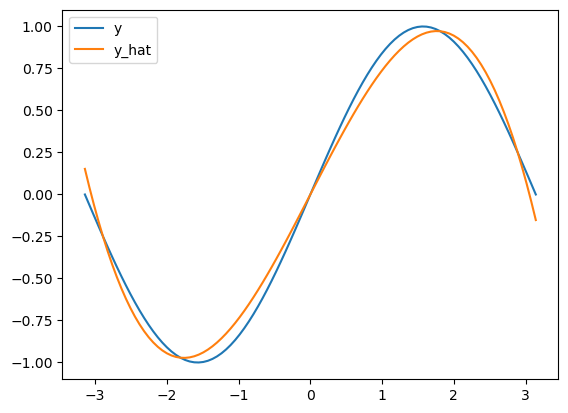

In [88]:
import torch.nn as nn

from torch.optim import Adam

import torch
import numpy as np
import torch.nn as nn
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0., requires_grad=True) 
b = torch.tensor(0., requires_grad=True) 
c = torch.tensor(0., requires_grad=True) 
d = torch.tensor(0., requires_grad=True) 
# 하이퍼파라메터
eta = 1e-3
epochs = 5000

optim = Adam([a,b,c,d],lr =eta)
#기저함수 행렬(100,4)
X_theta = torch.stack([X**3,X**2, X, torch.ones_like(X)],dim=1)
model = nn.Linear(4,1,bias=False)
# 가중치 적용
optim = Adam(model.parameters(), lr=eta)
#손실함수
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    optim.zero_grad()
    y_hat = model(X_theta).squeeze()
    loss = criterion(y_hat, y) 
    loss.backward()
    optim.step()

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()    


In [94]:
# X = np.linspace(-np.pi, np.pi, 100)
# (X**3).shape
X = np.array([1,2,3])
a,b = 2,3
print(X**3) 
print(X**2)
print(a*X**3+b*X**2)

[ 1  8 27]
[1 4 9]
[ 5 28 81]


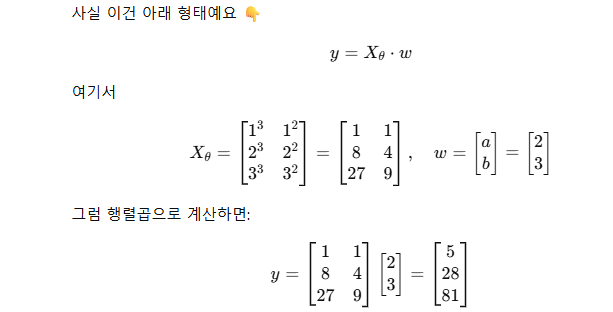

In [97]:
phi = np.stack([X**3,X**2], axis=1)
w = np.array([2,3])
pred = phi@w
